In [1]:
import os
print (os.getcwd())

/home/cesar/python-projects/Overcooked-coop-voice


In [2]:
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.visualization.visualization_utils import show_image_in_ipython
from overcooked_ai_py.utils import generate_temporary_file_path
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld
from overcooked_ai_py.visualization.pygame_utils import vstack_surfaces
import pygame
import numpy as np

pygame 2.6.1 (SDL 2.28.4, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Initialisation de pygame pour les visualisations
import pygame
pygame.init()
pygame.display.set_mode((1, 1))  # Mode headless pour les notebooks

<Surface(1x1x32 SW)>

In [4]:
state_visualizer = StateVisualizer()
def render_state(grid_txt):
    grid = [layout_row.strip() for layout_row in grid_txt.split("\n")]
    mdp = OvercookedGridworld.from_grid(grid)
    mdp.start_state = mdp.get_standard_start_state()
    print("Recettes disponibles:", mdp.start_state.all_orders)
    
    # Rendu de la grille
    grid_surface = pygame.surface.Surface(state_visualizer._unscaled_grid_pixel_size(mdp.terrain_mtx))
    state_visualizer._render_grid(grid_surface, mdp.terrain_mtx)
    state_visualizer._render_players(grid_surface, mdp.start_state.players)
    state_visualizer._render_objects(grid_surface, mdp.start_state.objects, mdp.terrain_mtx)
    
    # Rendu du HUD
    hud_data = state_visualizer.default_hud_data(mdp.start_state)
    hud_surface = pygame.surface.Surface((300, state_visualizer._calculate_hud_height(hud_data)))
    hud_surface.fill(state_visualizer.background_color)
    state_visualizer._render_hud_data(hud_surface, hud_data)
    
    # Combinaison des surfaces
    rendered_surface = vstack_surfaces([grid_surface, hud_surface], state_visualizer.background_color)
    img_path = generate_temporary_file_path(prefix="overcooked_visualized_state_", extension=".png")
    pygame.image.save(rendered_surface, img_path)
    show_image_in_ipython(img_path, width=700)

In [5]:
state_visualizer = StateVisualizer()
def render_layout(grid_txt):
    grid = [layout_row.strip() for layout_row in grid_txt.split("\n")]
    mdp = OvercookedGridworld.from_grid(grid)
    mdp.start_state = mdp.get_standard_start_state()
    grid_surface = pygame.surface.Surface(state_visualizer._unscaled_grid_pixel_size(mdp.terrain_mtx))
    state_visualizer._render_grid(grid_surface, mdp.terrain_mtx)
    state_visualizer._render_players(grid_surface, mdp.start_state.players)
    img_path = generate_temporary_file_path(prefix="overcooked_visualized_layout_", extension=".png")
    pygame.image.save(grid_surface, img_path)
    show_image_in_ipython(img_path, width=700)


🗂️  Exploration du dossier: generation_cesar
🔍 Recherche dans: ./overcooked_ai_py/data/layouts/generation_cesar/
✅ 2 layouts trouvés dans generation_cesar
🔄 Traitement 1/2: layout_cesar_0.layout
Erreur d'extraction des métadonnées: '{' was never closed (<string>, line 1)

📁 Layout: layout_cesar_0
📊 Recettes: []
🥄 Valeur oignon: N/A
🍅 Valeur tomate: N/A
🔧 Grille: 7 lignes, largeur: 7 caractères
🔍 Aperçu de la grille nettoyée:
   Ligne 1: 'XXTXXXX'
   Ligne 2: 'X     S'
   Ligne 3: 'D  2  X'
   ... et 4 autres lignes


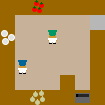

✅ Image générée avec succès
🔄 Traitement 2/2: layout_cesar_1.layout
Erreur d'extraction des métadonnées: '{' was never closed (<string>, line 1)

📁 Layout: layout_cesar_1
📊 Recettes: []
🥄 Valeur oignon: N/A
🍅 Valeur tomate: N/A
🔧 Grille: 7 lignes, largeur: 7 caractères
🔍 Aperçu de la grille nettoyée:
   Ligne 1: 'XXXXXXX'
   Ligne 2: 'D 1   X'
   Ligne 3: 'X   2 X'
   ... et 4 autres lignes


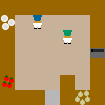

✅ Image générée avec succès

📊 Résumé: 2/2 layouts traités avec succès
🖼️  Images affichées: 2
📏 Tailles de grilles: min=7, max=7, moy=7.0

⏱️  Temps d'exécution: 0.02 secondes

🎛️  Contrôles disponibles:
   - PREVIEW_MODE = True (pour limiter l'affichage)
   - MAX_LAYOUTS_PREVIEW = 10 (nombre max d'aperçus)
💡 Modifiez ces variables pour personnaliser l'affichage


In [6]:
# Affichage optimisé des layouts du dossier generation_cesar
import os
import json
import glob
from IPython.display import clear_output
import time
import re

def extract_grid_from_python_json(content):
    """Extrait le contenu de la grille d'un pseudo-JSON avec des triple quotes Python"""
    try:
        # Rechercher le pattern "grid": """..."""
        pattern = r'"grid":\s*"""(.*?)"""'
        match = re.search(pattern, content, re.DOTALL)
        
        if match:
            grid_content = match.group(1)
            # Nettoyer les caractères de tabulation et d'espacement excessif
            return grid_content.strip()
        else:
            return None
    except Exception as e:
        print(f"Erreur d'extraction: {e}")
        return None

def extract_metadata_from_content(content):
    """Extrait les métadonnées du fichier layout"""
    try:
        # Extraire start_all_orders
        orders_pattern = r'"start_all_orders":\s*(\[.*?\])'
        orders_match = re.search(orders_pattern, content, re.DOTALL)
        orders = eval(orders_match.group(1)) if orders_match else []
        
        # Extraire onion_value
        onion_pattern = r'"onion_value":\s*(\d+)'
        onion_match = re.search(onion_pattern, content)
        onion_value = int(onion_match.group(1)) if onion_match else 'N/A'
        
        # Extraire tomato_value
        tomato_pattern = r'"tomato_value":\s*(\d+)'
        tomato_match = re.search(tomato_pattern, content)
        tomato_value = int(tomato_match.group(1)) if tomato_match else 'N/A'
        
        return {
            'start_all_orders': orders,
            'onion_value': onion_value,
            'tomato_value': tomato_value
        }
    except Exception as e:
        print(f"Erreur d'extraction des métadonnées: {e}")
        return {
            'start_all_orders': [],
            'onion_value': 'N/A',
            'tomato_value': 'N/A'
        }

def clean_grid_layout(grid_txt):
    """Nettoie et normalise un layout de grille pour éviter les erreurs 'Ragged grid'"""
    # Nettoyer les caractères de contrôle et normaliser les espaces
    # Remplacer les tabulations par des espaces
    grid_txt = grid_txt.replace('\t', '').strip()
    
    # Diviser en lignes et nettoyer chaque ligne
    lines = []
    for line in grid_txt.split('\n'):
        # Supprimer les espaces en début et fin, garder les espaces intérieurs
        cleaned_line = line.strip()
        if cleaned_line:  # Ignorer les lignes vides
            lines.append(cleaned_line)
    
    if not lines:
        return None
    
    # Trouver la largeur maximale
    max_width = max(len(line) for line in lines)
    
    # Normaliser toutes les lignes à la même largeur
    normalized_lines = []
    for line in lines:
        if len(line) < max_width:
            # Ajouter des espaces à droite pour égaliser la largeur
            line = line + ' ' * (max_width - len(line))
        normalized_lines.append(line)
    
    return '\n'.join(normalized_lines)

def load_and_display_layout_from_file(layout_path, show_images=True):
    """Charge et affiche un layout depuis un fichier .layout (pseudo-JSON avec triple quotes)"""
    try:
        with open(layout_path, 'r', encoding='utf-8') as f:
            content = f.read().strip()
        
        layout_name = os.path.basename(layout_path).replace('.layout', '')
        
        # Extraire la grille avec le parser spécialisé
        grid_txt = extract_grid_from_python_json(content)
        
        if not grid_txt:
            print(f"❌ Impossible d'extraire la grille du fichier")
            return False, layout_name, 0
        
        # Extraire les métadonnées
        metadata = extract_metadata_from_content(content)
        
        print(f"\n{'='*60}")
        print(f"📁 Layout: {layout_name}")
        print(f"📊 Recettes: {metadata['start_all_orders']}")
        print(f"🥄 Valeur oignon: {metadata['onion_value']}")
        print(f"🍅 Valeur tomate: {metadata['tomato_value']}")
        print(f"{'='*60}")
        
        # Nettoyer le layout pour éviter les erreurs "Ragged grid"
        cleaned_grid = clean_grid_layout(grid_txt)
        if cleaned_grid is None:
            print(f"❌ Layout vide ou invalide après nettoyage")
            return False, layout_name, 0
        
        # Debug: afficher les dimensions de la grille
        grid_lines = cleaned_grid.split('\n')
        line_lengths = [len(line) for line in grid_lines]
        print(f"🔧 Grille: {len(grid_lines)} lignes, largeur: {max(line_lengths)} caractères")
        
        # Afficher un aperçu de la grille nettoyée
        print(f"🔍 Aperçu de la grille nettoyée:")
        for i, line in enumerate(grid_lines[:3]):
            print(f"   Ligne {i+1}: '{line}'")
        if len(grid_lines) > 3:
            print(f"   ... et {len(grid_lines)-3} autres lignes")
        
        # Afficher le layout seulement si demandé
        if show_images:
            try:
                render_layout(cleaned_grid)
                print(f"✅ Image générée avec succès")
                return True, layout_name, len(grid_lines)
            except Exception as render_error:
                print(f"❌ Erreur lors du rendu: {render_error}")
                return False, layout_name, len(grid_lines)
        
        return True, layout_name, len(grid_lines)
        
    except Exception as e:
        print(f"❌ Erreur lors du chargement de {layout_name}: {e}")
        return False, layout_name, 0

def explore_layouts_in_directory(directory_path, directory_name, max_layouts=10, preview_mode=True):
    """Explore et affiche tous les layouts d'un répertoire donné avec optimisations"""
    print(f"🔍 Recherche dans: {directory_path}")
    
    if not os.path.exists(directory_path):
        print(f"❌ Répertoire non trouvé: {directory_path}")
        return False
    
    layout_files = glob.glob(os.path.join(directory_path, "*.layout"))
    layout_files.sort()  # Trier par nom
    
    if not layout_files:
        print(f"❌ Aucun fichier .layout trouvé dans {directory_name}")
        return False
    
    total_layouts = len(layout_files)
    print(f"✅ {total_layouts} layouts trouvés dans {directory_name}")
    
    if preview_mode and total_layouts > max_layouts:
        print(f"🚀 Mode aperçu activé: affichage des {max_layouts} premiers layouts")
        print(f"💡 Pour voir tous les layouts, changez PREVIEW_MODE=False")
        layout_files = layout_files[:max_layouts]
    
    success_count = 0
    images_displayed = 0
    layout_info = []
    
    # Barre de progression simple
    for i, layout_file in enumerate(layout_files, 1):
        print(f"🔄 Traitement {i}/{len(layout_files)}: {os.path.basename(layout_file)}")
        
        # En mode aperçu, afficher les images pour tous les layouts traités
        # En mode complet, afficher toutes les images
        should_show_image = True
        
        success, name, grid_size = load_and_display_layout_from_file(
            layout_file, 
            show_images=should_show_image
        )
        
        if success:
            success_count += 1
            layout_info.append((name, grid_size))
            if should_show_image:
                images_displayed += 1
    
    # Résumé optimisé
    print(f"\n📊 Résumé: {success_count}/{len(layout_files)} layouts traités avec succès")
    print(f"🖼️  Images affichées: {images_displayed}")
    if preview_mode and total_layouts > max_layouts:
        print(f"📈 Layouts restants: {total_layouts - max_layouts}")
    
    # Statistiques rapides
    if layout_info:
        grid_sizes = [size for _, size in layout_info]
        print(f"📏 Tailles de grilles: min={min(grid_sizes)}, max={max(grid_sizes)}, moy={sum(grid_sizes)/len(grid_sizes):.1f}")
    
    return True

# Configuration optimisée - Tester avec 2 layouts d'abord
PREVIEW_MODE = True  # Changer à False pour voir tous les layouts
MAX_LAYOUTS_PREVIEW = 10  # Réduire à 2 pour tester plus rapidement

# Rechercher les layouts dans différents dossiers
directories_to_check = [
    ("./overcooked_ai_py/data/layouts/generation_cesar/", "generation_cesar"),
    ("./overcooked_ai_py/data/layouts/generation_cesar_static/", "generation_cesar_static")
]

layouts_found = False
start_time = time.time()

for directory_path, directory_name in directories_to_check:
    print(f"\n🗂️  Exploration du dossier: {directory_name}")
    print("="*80)
    
    if explore_layouts_in_directory(directory_path, directory_name, MAX_LAYOUTS_PREVIEW, PREVIEW_MODE):
        layouts_found = True
        break  # Arrêter après avoir trouvé le premier dossier avec des layouts

execution_time = time.time() - start_time
print(f"\n⏱️  Temps d'exécution: {execution_time:.2f} secondes")

if not layouts_found:
    print("\n❌ Aucun layout trouvé dans les répertoires spécifiés")
    print("💡 Vérifiez que les layouts ont été générés correctement")
    print("📁 Répertoires vérifiés:")
    for directory_path, directory_name in directories_to_check:
        print(f"   - {directory_path}")
        
print(f"\n🎛️  Contrôles disponibles:")
print(f"   - PREVIEW_MODE = {PREVIEW_MODE} (pour limiter l'affichage)")
print(f"   - MAX_LAYOUTS_PREVIEW = {MAX_LAYOUTS_PREVIEW} (nombre max d'aperçus)")
print(f"💡 Modifiez ces variables pour personnaliser l'affichage")